**Answer to 1.1. a)**

I would argue that a flexible statistical learning method would be **better** than an inflexible method. The reasons are as follows:

*   The large sample size would reduce the variance of error and hence during training the small changes in data shouldn't have much effect. 

*   The computational cost to build a flexible method is less due to less number of predictors. 

**Answer to 1.1. b)**

I would argue that a flexible statistical learning method would be **worse** than an inflexible method. The reasons are as follows:

*   The computational cost to build a flexible method is high due to large number of predictors. 

*   The small sample size would increase the variance of error and hence during training the small changes in data would have a large effect if we use a flexible method, as flexible methods have a higher variance than inflexible ones.



**Answer to 1.1. c)**

I would argue that a flexible statistical learning method would be **better** than an inflexible method. The reason is as follows:

*   An increased flexibility of the model would allow the method to better capture the non-linearity of the relationship and reduce the bias, or error that is an ingerent part of a real-life problem.

*   On the other hand, an inflexible method would have an increased bias and error and hence would not perform well.

**Answer to 1.1. d)**

I would argue that a flexible statistical learning method would be **worse** than an inflexible method. The reasons are as follows:

*    A flexible method would fit the noise related to the high variance and would result in the degradation of its performance.

*    In order to minimize the risk of initially overfitting the data, it would be better to start of with a less-flexible and computationally less-costly method.


**Answer to 1.2. a)**

As we increase s from 0, the training RSS will **steadily decrease**. The reason is as follows:

As 's' increases, the ℓ1 penalty budget increases, creating less restriction. In other words, the coefficients are less restricted and they increase to their least square estimate values. This essentially implies that the model is becoming more and more flexible which is  going to shrink the RSS until it eventually yields the least squares solution.

**Answer to 1.2. b)**

As we increase s from 0, the test RSS will **decrease initially, and then eventually start increasing in a U shape.** The reason is as follows:

When s=0, it implies that all Bj =0 and the model is very simple with high test RSS. As s increases from 0, the coefficients are less restricted and they increase to their least square estimate values. Consequently, the model begins fitting well on test data and the test RSS decreases before increasing (overfitting to the training data) again in the typical U shape.

**Answer to 2**

In [ ]:
# Mounting the Google Drive for accessing the dataset
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Importing the necessary package to read the dataset
import pandas as pd

# Reading the content of the datasets to a dataframe
df = pd.read_csv("/content/drive/My Drive/Colab Notebooks/Data Files/leukemia_small.csv")

print(df.head(5))

        ALL     ALL.1     ALL.2  ...    ALL.44    ALL.45    ALL.46
0  0.561549 -0.623141 -0.814524  ...  0.013516 -0.353390 -0.525819
1  0.213566 -0.912107 -1.084069  ...  1.817207  0.063489  1.362307
2 -0.636584 -0.465296 -0.583127  ...  0.172399 -0.195105 -0.367815
3  0.347124 -0.734345  1.785912  ...  0.429806 -0.101432 -0.922238
4  0.545509 -0.539898  1.445064  ... -0.508952  0.414814 -0.900327

[5 rows x 72 columns]


In [ ]:
# Extracting the class labels
class_labels = df.columns.to_list()
cl = []
for i in class_labels:
  cl.append(i[0:3])

myset = set(cl)
print(myset)


{'ALL', 'AML'}


In [ ]:
# Renaming the columns as 0 for ALL and 1 for AML
my_dict={}

for index,column_name in enumerate(df.columns):
  if column_name[0:3] == 'ALL':
    my_dict[column_name] = 0
  elif column_name[0:3] == 'AML':
    my_dict[column_name] = 1

df = df.rename(columns=my_dict)

print(df.head(5))

          0         0         0  ...         0         0         0
0  0.561549 -0.623141 -0.814524  ...  0.013516 -0.353390 -0.525819
1  0.213566 -0.912107 -1.084069  ...  1.817207  0.063489  1.362307
2 -0.636584 -0.465296 -0.583127  ...  0.172399 -0.195105 -0.367815
3  0.347124 -0.734345  1.785912  ...  0.429806 -0.101432 -0.922238
4  0.545509 -0.539898  1.445064  ... -0.508952  0.414814 -0.900327

[5 rows x 72 columns]


In [ ]:
# Organizing the dataset into predictors and response variables
# Each Column is patient with its associated target class and each row is predictor
# Transposing the original dataset and adding an extra column target class to the dataset

df = df.T
y = df.index.to_list()
df['Target'] = y

# Dividing the predictor dataframe and target dataframe
X = df.loc[:, df.columns != 'Target'] 
y = df['Target']
df.shape

(72, 3572)

In [ ]:
# Importing the necessary packages

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
# Randomly splitting the data into training and testing with a ratio of 7:3

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state = 1)


**2.a.**

In [ ]:
# Fitting a logistic regression with no penalization
clf = LogisticRegression(penalty='none',solver='lbfgs',random_state=1).fit(X_train,y_train)
print(clf)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='none',
                   random_state=1, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


**2.b.**

In [ ]:
# @TL test
c = 10000
for i in range(0,6):
  c = c/10
  lambd = 1/c
  print("c = %f, lambda = %f" %(c, lambd))


c = 1000.000000, lambda = 0.001000
c = 100.000000, lambda = 0.010000
c = 10.000000, lambda = 0.100000
c = 1.000000, lambda = 1.000000
c = 0.100000, lambda = 10.000000
c = 0.010000, lambda = 100.000000


In [ ]:
# Fitting a l1 penalized logistic regression with different lambda values
# We use liblinear solver for better accuracy
# Here lambda = 1 / C

c = 10000

# Initializing the 
clf_l1 = []

for i in range(0,6):
  c = c/10
  clf_l1.append(LogisticRegression(penalty='l1',C=c,solver='liblinear',random_state=1).fit(X_train,y_train))

print(clf_l1)

[LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False), LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False), LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l1',
                   random_state=1, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False), LogisticR

**2.c.**

In [ ]:
# Fitting a l2 penalized logistic regression with different lambda values
# We use newton-cg solver for better accuracy
# Here lambda = 1 / C

c = 10000

# Initializing the 
clf_l2 = []

for i in range(0,6):
  c = c/10
  clf_l2.append(LogisticRegression(penalty='l2',C=c,solver='newton-cg',random_state=1).fit(X_train,y_train))

print(clf_l2)

[LogisticRegression(C=1000.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False), LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False), LogisticRegression(C=10.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False), LogisticR

**2.d.**

In [ ]:
# Fitting a elasticnet-penalized logistic regression with different l1_ratio values
# We use saga solver for better accuracy

clf_elasticnet =[]

for l1_rat in 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9, 0.99:
    clf_elasticnet.append(LogisticRegression(penalty='elasticnet',solver='saga',l1_ratio=l1_rat,random_state=1,max_iter=6000).fit(X_train,y_train))

print(clf_elasticnet)

[LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.01, max_iter=6000,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=1, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.1, max_iter=6000,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=1, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=0.2, max_iter=6000,
                   multi_class='auto', n_jobs=None, penalty='elasticnet',
                   random_state=1, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False), Logis

**2.e.**

In [ ]:
# Fitting kNN classifiers with different nearest neighbour values

clf_kNN =[]

for n in 1, 2, 3, 4, 5, 10:
  clf_kNN.append(KNeighborsClassifier(n_neighbors=n, p=2, metric="euclidean").fit(X_train,y_train))

print(clf_kNN)

[KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform'), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='uniform'), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform'), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=4, p=2,
                     weights='uniform'), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform'), KNeighborsClassifier(algorithm='auto', leaf_size=30, metric

**2.f.**

In [ ]:
# Performace score for logistic regression with no penalization

k = clf.predict(X_train)
k2 = clf.predict(X_test)
accuracy_no_regularization_train = accuracy_score(y_train,k)
accuracy_no_regularization_test = accuracy_score(y_test,k2)

print("The accuracy score without regularization for the training dataset is " + str(accuracy_no_regularization_train))
print("The accuracy score without regularization for the test dataset is " + str(accuracy_no_regularization_test))

The accuracy score without regularization for the training dataset is 1.0
The accuracy score without regularization for the test dataset is 0.8636363636363636


In [ ]:
# Performace score for l1-penalized logistic regression having the given lambda values

accuracy_l1_train, accuracy_l1_test = [], []

for model in clf_l1:
  k = model.predict(X_train)
  k2 = model.predict(X_test)
  accuracy_l1_train.append(accuracy_score(y_train,k))
  accuracy_l1_test.append(accuracy_score(y_test,k2))

c=0
print("The accuracy score with l1 regularization for the training dataset is as follows:\n")
for i in 0.001, 0.01, 0.1, 1, 10, 100:
  print("For lambda = "+str(i)+", Accuracy score = "+str(accuracy_l1_train[c]))
  c = c+1

c=0
print("\nThe accuracy score with l1 regularization for the test dataset is as follows:\n")
for i in 0.001, 0.01, 0.1, 1, 10, 100:
  print("For lambda = "+str(i)+", Accuracy score = "+str(accuracy_l1_test[c]))
  c = c+1

The accuracy score with l1 regularization for the training dataset is as follows:

For lambda = 0.001, Accuracy score = 1.0
For lambda = 0.01, Accuracy score = 1.0
For lambda = 0.1, Accuracy score = 1.0
For lambda = 1, Accuracy score = 1.0
For lambda = 10, Accuracy score = 1.0
For lambda = 100, Accuracy score = 0.66

The accuracy score with l1 regularization for the test dataset is as follows:

For lambda = 0.001, Accuracy score = 0.9090909090909091
For lambda = 0.01, Accuracy score = 0.9545454545454546
For lambda = 0.1, Accuracy score = 0.9545454545454546
For lambda = 1, Accuracy score = 0.9545454545454546
For lambda = 10, Accuracy score = 0.9545454545454546
For lambda = 100, Accuracy score = 0.6363636363636364


In [ ]:
# Performace score for l2-penalized logistic regression having the given lambda values

accuracy_l2_train, accuracy_l2_test = [], []

for model in clf_l2:
  k = model.predict(X_train)
  k2 = model.predict(X_test)
  accuracy_l2_train.append(accuracy_score(y_train,k))
  accuracy_l2_test.append(accuracy_score(y_test,k2))

c=0
print("The accuracy score with l2 regularization for the training dataset is as follows:\n")
for i in 0.001, 0.01, 0.1, 1, 10, 100:
  print("For lambda = "+str(i)+", Accuracy score = "+str(accuracy_l2_train[c]))
  c = c+1

c=0
print("\nThe accuracy score with l2 regularization for the test dataset is as follows:\n")
for i in 0.001, 0.01, 0.1, 1, 10, 100:
  print("For lambda = "+str(i)+", Accuracy score = "+str(accuracy_l2_test[c]))
  c = c+1

The accuracy score with l2 regularization for the training dataset is as follows:

For lambda = 0.001, Accuracy score = 1.0
For lambda = 0.01, Accuracy score = 1.0
For lambda = 0.1, Accuracy score = 1.0
For lambda = 1, Accuracy score = 1.0
For lambda = 10, Accuracy score = 1.0
For lambda = 100, Accuracy score = 1.0

The accuracy score with l2 regularization for the test dataset is as follows:

For lambda = 0.001, Accuracy score = 0.8636363636363636
For lambda = 0.01, Accuracy score = 1.0
For lambda = 0.1, Accuracy score = 1.0
For lambda = 1, Accuracy score = 1.0
For lambda = 10, Accuracy score = 1.0
For lambda = 100, Accuracy score = 1.0


In [ ]:
# Performace score for elastic-penalized logistic regression with the given l1_ratio values

accuracy_elasticnet_train, accuracy_elasticnet_test = [], []

for model in clf_elasticnet:
  k = model.predict(X_train)
  k2 = model.predict(X_test)
  accuracy_elasticnet_train.append(accuracy_score(y_train,k))
  accuracy_elasticnet_test.append(accuracy_score(y_test,k2))

c=0
print("The accuracy score with elastic net regularization for the training dataset is as follows:\n")
for i in 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9, 0.99:
  print("For l1_tatio = "+str(i)+", Accuracy score = "+str(accuracy_elasticnet_train[c]))
  c = c+1

c=0
print("\nThe accuracy score with elastic net regularization for the test dataset is as follows:\n")
for i in 0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9, 0.99:
  print("For l1_ratio = "+str(i)+", Accuracy score = "+str(accuracy_elasticnet_test[c]))
  c = c+1


The accuracy score with elastic net regularization for the training dataset is as follows:

For l1_tatio = 0.01, Accuracy score = 1.0
For l1_tatio = 0.1, Accuracy score = 1.0
For l1_tatio = 0.2, Accuracy score = 1.0
For l1_tatio = 0.3, Accuracy score = 1.0
For l1_tatio = 0.4, Accuracy score = 1.0
For l1_tatio = 0.5, Accuracy score = 1.0
For l1_tatio = 0.6, Accuracy score = 1.0
For l1_tatio = 0.7, Accuracy score = 1.0
For l1_tatio = 0.8, Accuracy score = 1.0
For l1_tatio = 0.9, Accuracy score = 1.0
For l1_tatio = 0.99, Accuracy score = 1.0

The accuracy score with elastic net regularization for the test dataset is as follows:

For l1_ratio = 0.01, Accuracy score = 0.8636363636363636
For l1_ratio = 0.1, Accuracy score = 0.9090909090909091
For l1_ratio = 0.2, Accuracy score = 0.9545454545454546
For l1_ratio = 0.3, Accuracy score = 0.9545454545454546
For l1_ratio = 0.4, Accuracy score = 0.9545454545454546
For l1_ratio = 0.5, Accuracy score = 0.9545454545454546
For l1_ratio = 0.6, Accuracy 

In [ ]:
# Performace score for kNN classifiers with different number of neighbourhood values

accuracy_kNN_train, accuracy_kNN_test = [], []

for model in clf_kNN:
  k = model.predict(X_train)
  k2 = model.predict(X_test)
  accuracy_kNN_train.append(accuracy_score(y_train,k))
  accuracy_kNN_test.append(accuracy_score(y_test,k2))

c=0
print("The accuracy score with kNN for the training dataset is as follows:\n")
for i in 1, 2, 3, 4, 5, 10:
  print("For n_neighbors= "+str(i)+", Accuracy score = "+str(accuracy_kNN_train[c]))
  c = c+1

c=0
print("\nThe accuracy score with elastic net regularization for the test dataset is as follows:\n")
for i in 1, 2, 3, 4, 5, 10:
  print("For n_neighbors= "+str(i)+", Accuracy score = "+str(accuracy_kNN_test[c]))
  c = c+1



The accuracy score with kNN for the training dataset is as follows:

For n_neighbors= 1, Accuracy score = 1.0
For n_neighbors= 2, Accuracy score = 1.0
For n_neighbors= 3, Accuracy score = 1.0
For n_neighbors= 4, Accuracy score = 0.98
For n_neighbors= 5, Accuracy score = 0.98
For n_neighbors= 10, Accuracy score = 0.96

The accuracy score with elastic net regularization for the test dataset is as follows:

For n_neighbors= 1, Accuracy score = 1.0
For n_neighbors= 2, Accuracy score = 0.9090909090909091
For n_neighbors= 3, Accuracy score = 1.0
For n_neighbors= 4, Accuracy score = 0.9545454545454546
For n_neighbors= 5, Accuracy score = 0.9545454545454546
For n_neighbors= 10, Accuracy score = 0.8181818181818182


**2.g.**

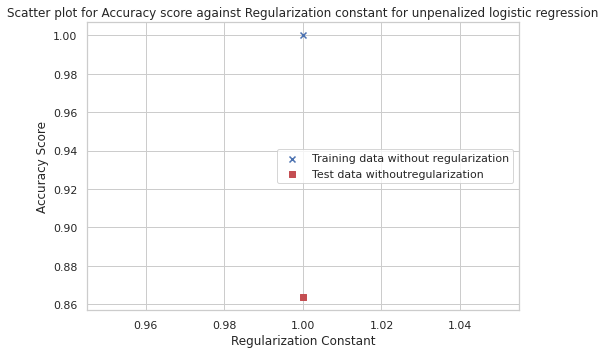

In [ ]:
# Scatterplot for the unpenalized logistic regression

c = [1]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(c,accuracy_no_regularization_train, c='b', marker='x', label='Training data without regularization')
ax.scatter(c,accuracy_no_regularization_test, c='r', marker='s', label='Test data withoutregularization')
ax.legend(loc='best')
ax.set_xlabel('Regularization Constant')
ax.set_ylabel('Accuracy Score')
ax.set_title('Scatter plot for Accuracy score against Regularization constant for unpenalized logistic regression')
plt.show()

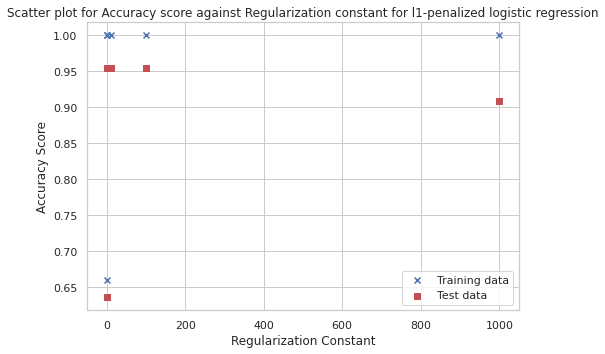

In [ ]:
# Scatterplot for the l1-penalized logistic regression

C = [1000, 100, 10, 1, 0.1, 0.01]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(C,accuracy_l1_train, c='b', marker='x', label='Training data')
ax.scatter(C,accuracy_l1_test, c='r', marker='s', label='Test data')
ax.legend(loc='best')
ax.set_xlabel('Regularization Constant')
ax.set_ylabel('Accuracy Score')
ax.set_title('Scatter plot for Accuracy score against Regularization constant for l1-penalized logistic regression')
plt.show()

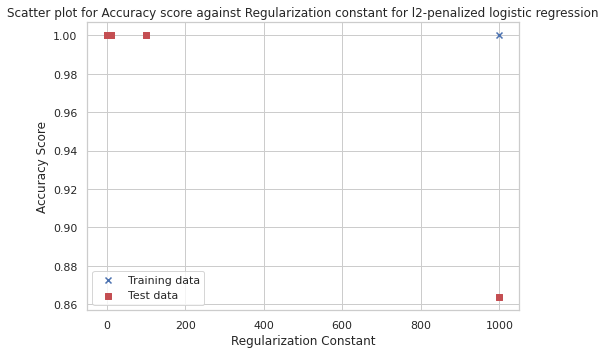

In [ ]:
# Scatterplot for the l2-penalized logistic regression

C = [1000, 100, 10, 1, 0.1, 0.01]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(C,accuracy_l2_train, c='b', marker='x', label='Training data')
ax.scatter(C,accuracy_l2_test, c='r', marker='s', label='Test data')
ax.legend(loc='best')
ax.set_xlabel('Regularization Constant')
ax.set_ylabel('Accuracy Score')
ax.set_title('Scatter plot for Accuracy score against Regularization constant for l2-penalized logistic regression')
plt.show()

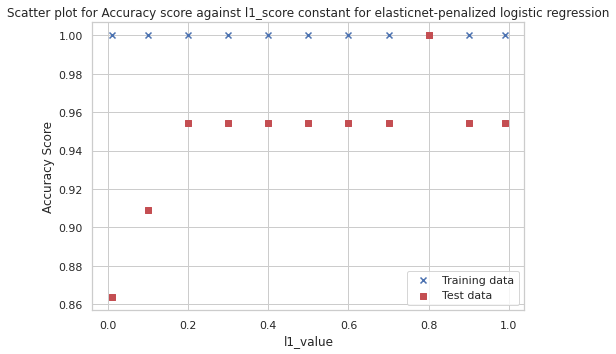

In [ ]:
# Scatterplot for the elasticnet-penalized logistic regression

C = [0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6,0.7, 0.8, 0.9, 0.99]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(C,accuracy_elasticnet_train, c='b', marker='x', label='Training data')
ax.scatter(C,accuracy_elasticnet_test, c='r', marker='s', label='Test data')
ax.legend(loc='best')
ax.set_xlabel('l1_value')
ax.set_ylabel('Accuracy Score')
ax.set_title('Scatter plot for Accuracy score against l1_score constant for elasticnet-penalized logistic regression')
plt.show()

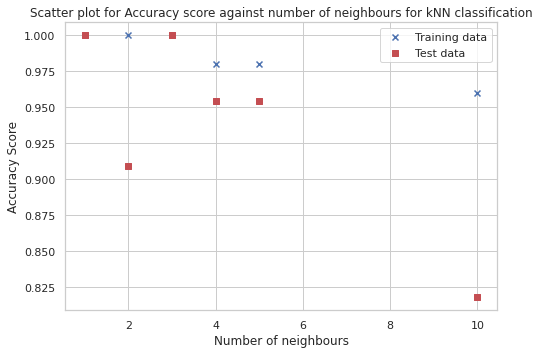

In [ ]:
# Scatterplot for the kNN

C = [1, 2, 3, 4, 5, 10]
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(C,accuracy_kNN_train, c='b', marker='x', label='Training data')
ax.scatter(C,accuracy_kNN_test, c='r', marker='s', label='Test data')
ax.legend(loc='best')
ax.set_xlabel('Number of neighbours')
ax.set_ylabel('Accuracy Score')
ax.set_title('Scatter plot for Accuracy score against number of neighbours for kNN classification')
plt.show()

**2.h.**

The following observation is made from the scatterplots and the results of the accuracy scores of the test set for the various logistic regression techniques as well as the kNN

*   **l2-penalized logistic regression** performs the best among the others like the unpenalized, l1-penalized, elastinet-pelanized and kNN. 

* The accuracy score for all the regularization constants are perfect 1 except only in one case. In all the other regressors, such perfect accuracy score is not achieved.

*   The parameters that give the best result for the l2-panalized logistic regression are:

       1.   Solver is **newton-cg**
       2.   Random State  = 1










**2.i.**

In [ ]:
# Importing necessary package

from sklearn.model_selection import cross_val_score

clf_l2_CV =[]

# Performing the 5-fold cross validation on the l2-penalized regression model for all the regularization parameters
for k in clf_l2:
  clf_l2_CV.append(cross_val_score(k,X,y,cv=5))

print("\nThe mean of the scores after running the 5-fold cross validation is as follows\n")

c=0
print("The accuracy score with kNN for the training dataset is as follows:\n")
for i in 1000,100,10,1,0.1,0.01:
  print("For regularization parameter = "+str(i)+", the mean accuracy score = "+str(clf_l2_CV[c].mean()))
  c = c+1


The mean of the scores after running the 5-fold cross validation is as follows

The accuracy score with kNN for the training dataset is as follows:

For regularization parameter = 1000, the mean accuracy score = 0.9438095238095239
For regularization parameter = 100, the mean accuracy score = 0.9857142857142858
For regularization parameter = 10, the mean accuracy score = 0.9857142857142858
For regularization parameter = 1, the mean accuracy score = 0.9857142857142858
For regularization parameter = 0.1, the mean accuracy score = 0.9857142857142858
For regularization parameter = 0.01, the mean accuracy score = 0.9857142857142858


**2.j.**

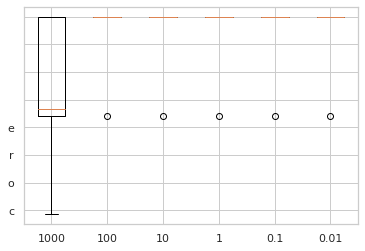

In [ ]:
# Drawing the boxplots for CV for each regularization parameter

my_dict ={}

c=0
for i in 1000,100,10,1,0.1,0.01:
  my_dict[i] = clf_l2_CV[c].tolist()
  c = c+1

fig, ax = plt.subplots()
ax.boxplot(my_dict.values())
ax.set_xticklabels(my_dict.keys())
ax.set_yticklabels(("score"))
plt.show()

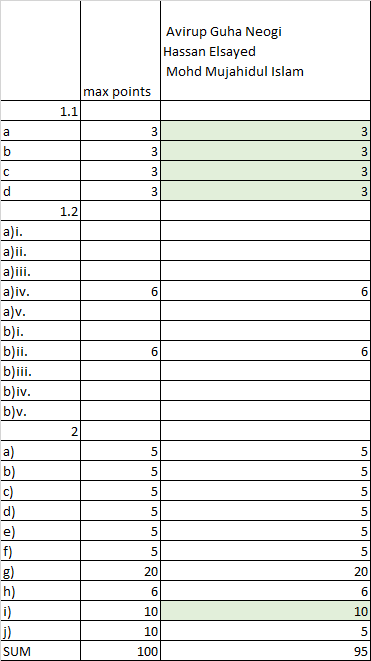